# Programming Exercise 1: Linear Regression

In this exercise, you will implement linear regression and get to see it work on data.

## Note on creating vertical arrays in python
You can use `vstack`, `reshape`, or `transpose` numpy functions. Additionally, you can use broadcasting to reshape the array. We will also define a helper function that adds a column of ones to the start of the matrix

In [98]:
arr = np.arange(5)
# all the lines below are equivalent
np.vstack(arr)
arr.reshape(len(arr), 1)
np.transpose([arr])
arr[:, None]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [144]:
def padOnes(X):
    m = len(X) # number of observations
    ones = np.vstack(np.ones(m))
    return np.append(ones, X, axis=1)

padOnes([[1, 2], [3, 4], [5, 6]])

array([[1., 1., 2.],
       [1., 3., 4.],
       [1., 5., 6.]])

# Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

## Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many
other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.

In [1]:
# import libraries used in this exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
from mpl_toolkits.mplot3d import Axes3D

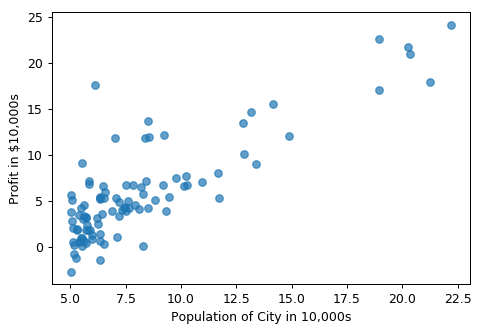

In [19]:
# reading the textfile, and then plotting the data
data = np.genfromtxt('ex1data1.txt', delimiter=",")
X = data[:, 0]
y = data[:, 1]
plt.figure(dpi=90)
plt.scatter(X, y, alpha=0.7)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

## Gradient Descent
In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.
### Update Equations
The objective of linear regression is to minimize the cost function:

$$ J(\theta) = {1\over2m} \times \sum_{i=1}^{m} {(h_\theta(x^i) - y^i)^2} $$


where the hypothesis $h_θ(x)$ is given by the linear model:

$$ h_θ(x) = \theta^T.x = \theta_0 + \theta_1.x$$


Recall that the parameters of your model are the θj values. These are
the values you will adjust to minimize cost J(θ). One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update:

$$ θ_j = θ_j − α{1\over m} \times \sum_{i=1}^{m} {(h_\theta(x^i) - y^i).x_j^i} $$

Note that we simultaneously update $θ_j$ for all $j$. With each step of gradient descent, your parameters $θ_j$ come closer to the optimal values that will achieve the lowest cost $J(θ)$.

###  Computing the cost J(θ)
As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation. The function `computeCost` computes J(θ). As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

Once you have completed the function, the next step will be to run `computeCost` once using θ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of `32.07`.

**Implementation Note:** We store each example as a row in the the X matrix. To take into account the intercept term ($θ_0$), we add an additional first column to X and set it to all ones. This allows
us to treat θ0 as simply another ‘feature’.

In [36]:
# we add another dimension to our data to accommodate the θ_0 intercept term
# We also initialize the initial parameters to 0 and thelearning rate alpha to 0.01

m = len(X) # number of observations
ones = np.ones(m)
X = data[:, 0]
iterations = 1500;
alpha = 0.01;
X = np.vstack((ones, X)).T
print(X[0:5])

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


In [37]:
def computeCost(X, y, theta):
    """Computes J(0)"""
    m = len(y)
    dot = X.dot(theta)
    costs = np.power(dot - y, 2)
    return (sum(costs)) / (2*m)

theta = [0, 0]

computeCost(X, y, theta)

32.072733877455654

### Implementing gradient descent
Next, you will implement gradient descent. As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y. 

A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. Assuming you have implemented gradient descent and
computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.

In [38]:
def computeCostDerivative(X, y, theta, j):
    m = len(y)
    dcosts = np.multiply((X.dot(theta) - y), X[:, j])
    return sum(dcosts) / m 

computeCostDerivative(X, y, theta, 0)

-5.83913505154639

In [57]:
def gradientDescent(X, y, theta = None, alpha = 0.01, num_iters = 5000, verbose = False):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    m = len(y) # number of training examples
    if theta==None: theta = np.zeros(X.shape[1])
    theta_temp = theta
    
    for i in range(num_iters):
        if verbose:
            cost = computeCost(X, y, theta)
            print('Iteration {}, Cost {:f}'.format(i, cost))
        for j in range(len(theta)):
            theta_temp[j] = theta[j] - alpha * computeCostDerivative(X, y, theta, j)
        theta = theta_temp
    return theta

gradientDescent(X, y)

array([-3.89533464,  1.1929889 ])

### Putting it together
We will derive the final parameters, and use them to plot the linear fit. The final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.


Testing the cost function ...

With theta = [0 ; 0]
Cost computed =  32.072733877455654
Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24


Running Gradient Descent ...

Theta found by gradient descent:
 [-3.7138233811201404, 1.1747869289482562]
Expected theta values (approx):
 -3.6303, 1.1664


For population = 35,000, we predict a profit of  3979.308701987563
For population = 70,000, we predict a profit of  45096.85121517653


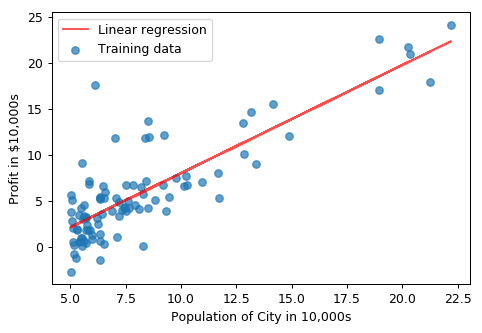

In [40]:
iterations, alpha = 1500, 0.01 # Some gradient descent settings

print('\nTesting the cost function ...\n')

# compute and display initial cost
theta = [0, 0]
J = computeCost(X, y, theta);
print('With theta = [0 ; 0]\nCost computed = ', J);
print('Expected cost value (approx) 32.07\n');

# further testing of the cost function
theta = [-1, 2]
J = computeCost(X, y, theta);
print('\nWith theta = [-1 ; 2]\nCost computed = ', J);
print('Expected cost value (approx) 54.24\n');

print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n', theta);

print('Expected theta values (approx):');
print(' -3.6303, 1.1664\n\n');

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta);
print('For population = 35,000, we predict a profit of ', predict1*10000);
predict2 = np.dot([1, 7], theta);
print('For population = 70,000, we predict a profit of ', predict2*10000);

# Plot the linear fit
plt.figure(dpi=90)
plt.scatter(X[:,1], y, alpha=0.7, label='Training data')
plt.plot(X[:,1], X.dot(theta), 'r-', alpha=0.7, label='Linear regression')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

## Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of $θ_0$ and $θ_1$ values. 

After these lines are executed, you will have a 2-D array of J(θ) values. The script will then use these values to produce surface and contour plots of J(θ).

The purpose of these graphs is to show you that how J(θ) varies with changes in θ0 and θ1. The cost function J(θ) is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for θ0 and θ1, and each step of
gradient descent moves closer to this point.

Visualizing J(theta_0, theta_1) ...

[-3.7138233811201404, 1.1747869289482562]


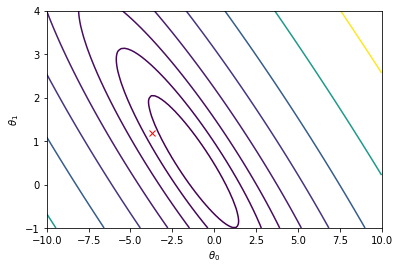

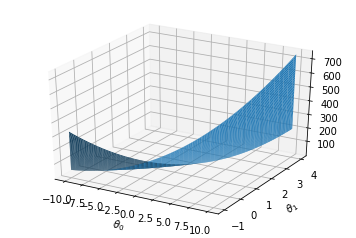

In [8]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, t)
        
plt.plot(theta[0], theta[1], 'rx')
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$'); plt.ylabel(r'$\theta_1$');

#%%
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlabel(r'$\theta_0$'); plt.ylabel(r'$\theta_1$');
ax.plot_surface(theta0_vals, theta1_vals, J_vals)

print(theta)

## Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is:
$$ \theta = (X^TX)^{-1}.(X^Ty) $$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term ($θ_0$).

In [153]:
def normalEq(X, y):
    X = padOnes(X)
    X = np.matrix(X)
    y = np.matrix(y).T
    thetas = (X.T*X).I * (X.T*y)
    return thetas.T

In [154]:
def normalEq(X, y):
    X = padOnes(X)
    term1 = X.T.dot(X)
    term2 = X.T.dot(y)
    inv = np.linalg.inv
    thetas = inv(term1).dot(term2)
    return thetas

In [11]:
%time th1 = normalEq(X, y)
print(th1)
computeCost(X, y, th1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.16 ms
[-3.89578088  1.19303364]


4.476971375975179

In [12]:
%time th2 = gradientDescent(X, y)
print(th2)
computeCost(X, y, th2)

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 48.6 ms
[-3.25088222  1.12836314]


4.51483333995351

## Comparing 3 ways to obtain $\theta$

In [88]:
# using gradient descent
print(gradientDescent(X, y))

# using normalizing equation
print(normalEq(X, y))

# using the sklearn library
from sklearn.linear_model import LinearRegression
XX = data[:,0][..., None]
model = LinearRegression().fit(XX, y)
print(model.intercept_, model.coef_)

[nan nan nan]
[89597.9095428    139.21067402 -8738.01911233]
71270.49244872911 [134.52528772]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


# Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing
prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


In [146]:
# importing the data
data = np.genfromtxt('ex1data2.txt', delimiter=",")
X = data[:, 0:2]
y = data[:, 2]

In [147]:
print('SQFT of house', 'N bedrooms', 'price')
print(data[:5])

SQFT of house N bedrooms price
[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


## Feature Normalization
When features diﬀer by orders of magnitude, ﬁrst performing feature scaling can make gradient descent converge much more quickly.
The function featureNormalize.m will
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). Note that each column of the matrix X corresponds to one feature.

**Implementation Note:** When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must ﬁrst normalize x using the mean and standard deviation that we had previously computed from the training set.


In [148]:
def featureNormalize(X):
    """
    FEATURENORMALIZE Normalizes the features in X. 
    FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)
print(X_norm[:5])
print('mean =', mu)
print('SD =', sigma)

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]
mean = [2000.68085106    3.17021277]
SD = [7.86202619e+02 7.52842809e-01]


## Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only diﬀerence now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged. The code in `gradientDescentMulti`  implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too. Make sure your code supports any number of features and is well-vectorized. You can use `X.shape[1]` to ﬁnd out how many features are present in the dataset

In [156]:
def gradientDescentMulti(X, y, theta = None, alpha = 0.01, num_iters = 5000):
    X_norm, mu, sigma = featureNormalize(X)
    paddedX_norm = padOnes(X_norm)
    theta_norm = gradientDescent(paddedX_norm, y, theta, alpha, num_iters)
    #theta = (theta_norm + mu) * sigma
    return theta_norm

gradientDescentMulti(X, y)

array([340412.65957447, 109447.79645521,  -6578.35483976])

## Comparing 3 ways to obtain $\theta$

In [159]:
# using gradient descent
print(gradientDescentMulti(X, y))

# using normalizing equation
print(normalEq(X, y))

# using the sklearn library
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(featureNormalize(data[:,0:2])[0], data[:,2])
print(model.intercept_, model.coef_)

[340412.65957447 109447.79645521  -6578.35483976]
[89597.9095428    139.21067402 -8738.01911233]
340412.6595744681 [109447.79646964  -6578.35485416]


In [107]:
X - np.std(X, axis=0)

array([[1.00000000e+00, 1.31779738e+03, 2.24715719e+00],
       [1.00000000e+00, 8.13797381e+02, 2.24715719e+00],
       [1.00000000e+00, 1.61379738e+03, 2.24715719e+00],
       [1.00000000e+00, 6.29797381e+02, 1.24715719e+00],
       [1.00000000e+00, 2.21379738e+03, 3.24715719e+00],
       [1.00000000e+00, 1.19879738e+03, 3.24715719e+00],
       [1.00000000e+00, 7.47797381e+02, 2.24715719e+00],
       [1.00000000e+00, 6.40797381e+02, 2.24715719e+00],
       [1.00000000e+00, 5.93797381e+02, 2.24715719e+00],
       [1.00000000e+00, 7.07797381e+02, 2.24715719e+00],
       [1.00000000e+00, 1.15379738e+03, 3.24715719e+00],
       [1.00000000e+00, 1.21379738e+03, 2.24715719e+00],
       [1.00000000e+00, 1.10379738e+03, 2.24715719e+00],
       [1.00000000e+00, 3.69179738e+03, 4.24715719e+00],
       [1.00000000e+00, 4.81797381e+02, 2.24715719e+00],
       [1.00000000e+00, 1.51379738e+03, 3.24715719e+00],
       [1.00000000e+00, 5.33797381e+02, 1.24715719e+00],
       [1.00000000e+00, 4.49797